In [1]:
import sys
XCr_path = '/Users/aliaksei/Downloads/lume-crystal-bpm'
sys.path.append(XCr_path)

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from XCrystal import *
import time

import XCrTools as tools

In [2]:
delta_theta = 0.0
omega0 = 9000.0

xcr = XCrystal(XCr_path+'/Crystal.yaml', omega0)
xtools = tools.XCrTools(xcr)

Quiet mode disabled. I will talk a lot...
Congigured grid parameters
Congigured a Gaussian beam
Initialized tools...


In [3]:
print('Bragg angle: ', xcr.alphaB * 180 / np.pi)

Bragg angle:  30.48558327729669


In [49]:
#xcr.dgrid_GenV2 = 1.2e-3
xcr.zsep_GenV2 = 1
    
field = pseudo_sase_beam.copy()

ntc, nxc, nyc = np.shape(field)
tmax = ntc * xcr.lam * xcr.zsep_GenV2 / xcr.c 
dt = tmax/(1.0*ntc)


pad_shape = [(xcr.tpad, xcr.tpad), (0, 0), (0, 0)]
field_padded = xtools.my_pad(field, pad_shape)
coeff = 2.0 * np.pi * xcr.hbar
w = np.fft.fftshift(coeff * np.fft.fftfreq(ntc + 2 * xcr.tpad, dt))
field_fft = np.fft.fftshift(np.fft.fft(field_padded, axis=0), axes=0)
print('padded field shape: ', np.shape(field_fft))

t_crop = 100
field_sim = xtools.crop_3d_wavefront(field_fft, cropping_factors=[t_crop, 1, 1])
w_sim = w[int(len(w)/2 - len(w)/t_crop/2):int(len(w)/2 + len(w)/t_crop/2)]

padded field shape:  (8292, 3200, 10)
Cropped pump field to a new shape (t, x, y):  82 3200 10


Text(0, 0.5, 'arb.')

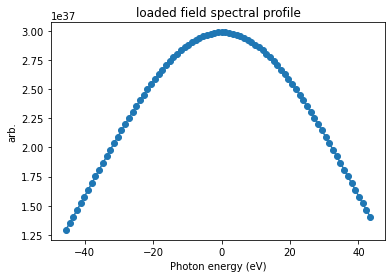

In [50]:
import matplotlib.pyplot as plt
plt.title('loaded field spectral profile')
plt.plot(w_sim, np.sum(np.real(field_sim * np.conj(field_sim)), axis=(1,2)),'o-')
#plt.xlim(-10, 10)
plt.xlabel('Photon energy (eV)')
plt.ylabel('arb.')

In [11]:
field = xtools.field_from_file_genesis2_DFL(xcr, crop_t = 1.0, crop_x = 1.0)

ntc, nxc, nyc = np.shape(field)
tmax = ntc * xcr.lam * xcr.zsep_GenV2 / xcr.c 
dt = tmax/(1.0*ntc)

old_domain = (np.linspace(-xcr.dgrid_GenV2*xcr.convr, xcr.dgrid_GenV2*xcr.convr, nxc), np.linspace(-xcr.dgrid_GenV2*xcr.convr, xcr.dgrid_GenV2*xcr.convr, nyc))
new_mesh = (xcr.Xx, xcr.Yy)
    
print('loaded field shape: ', np.shape(field))
print('simulation domain shape: ', np.shape(xcr.Xx))

pad_shape = [(xcr.tpad, xcr.tpad), (0, 0), (0, 0)]
field_padded = xtools.my_pad(field, pad_shape)
coeff = 2.0 * np.pi * xcr.hbar
w = np.fft.fftshift(coeff * np.fft.fftfreq(ntc + 2 * xcr.tpad, dt))
field_fft = np.fft.fftshift(np.fft.fft(field_padded, axis=0), axes=0)
print('padded field shape: ', np.shape(field_fft))

t_crop = 360
field_sim = xtools.crop_3d_wavefront(field_fft, cropping_factors=[t_crop, 1, 1])
w_sim = w[int(len(w)/2 - len(w)/t_crop/2):int(len(w)/2 + len(w)/t_crop/2)]

AttributeError: 'XCrystal' object has no attribute 'fname_GenV2'

Text(0, 0.5, 'arb.')

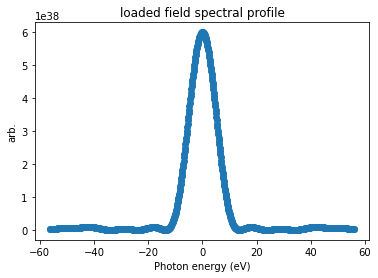

In [7]:
import matplotlib.pyplot as plt
plt.title('loaded field spectral profile')
plt.plot(w_sim, np.sum(np.real(field_sim * np.conj(field_sim)), axis=(1,2)),'o-')
#plt.xlim(-10, 10)
plt.xlabel('Photon energy (eV)')
plt.ylabel('arb.')

In [20]:
Npoints = len(field_sim)
print(Npoints)
Rs = np.zeros(Npoints)
Ts = np.zeros(Npoints)

23


In [10]:
def single_realization(delta_theta, w_ind):
    
    omega = omega0 + w_sim[w_ind]
    field_intrp = xtools.interpolate_wavefront_3D(field_fft[w_ind,:,:], old_domain, new_mesh)

    xcr = XCrystal(XCr_path+'/Crystal.yaml', omega)
    xcr.configure(delta_theta, field_intrp)
    xcr.run3D()
    
    return xcr.Reflectivity, xcr.Transmission

In [11]:
for i in range(0, Npoints):
    print(' ')
    print('iteration: ', i+1, '  dw: ', w_sim[i])
    Rs[i], Ts[i] = single_realization(delta_theta, i)

 
iteration:  1   dw:  -0.7041267643196033
Quiet mode disabled. I will talk a lot...
Congigured grid parameters
Congigured a Genesis2 beam
Congigured deformation model
Splitting recipe: Euler
Initialized tools...
Running with Genesis2 field
Delta theta:  0.0 ; Reflectivity:  0.005860304081345583 ; Transmission:  0.6416037452331523
 
iteration:  2   dw:  -0.678047995270729
Quiet mode disabled. I will talk a lot...
Congigured grid parameters
Congigured a Genesis2 beam
Congigured deformation model
Splitting recipe: Euler
Initialized tools...
Running with Genesis2 field
Delta theta:  0.0 ; Reflectivity:  0.006038393347422949 ; Transmission:  0.6391062845464073
 
iteration:  3   dw:  -0.6519692262218549
Quiet mode disabled. I will talk a lot...
Congigured grid parameters
Congigured a Genesis2 beam
Congigured deformation model
Splitting recipe: Euler
Initialized tools...
Running with Genesis2 field
Delta theta:  0.0 ; Reflectivity:  0.0062839502288486535 ; Transmission:  0.6371202952584604
 

In [12]:
matplotlib.rcParams['figure.figsize'] = (12,8)
matplotlib.rcParams['axes.labelsize'] = 20
matplotlib.rcParams['xtick.labelsize'] = 20
matplotlib.rcParams['ytick.labelsize'] = 20
matplotlib.rcParams['legend.fontsize'] = 20

In [ ]:
# XOPfile = 'Si4009keVThickness50um'
# XOPdata = np.loadtxt(XOPfile)

Text(0, 0.5, 'R')

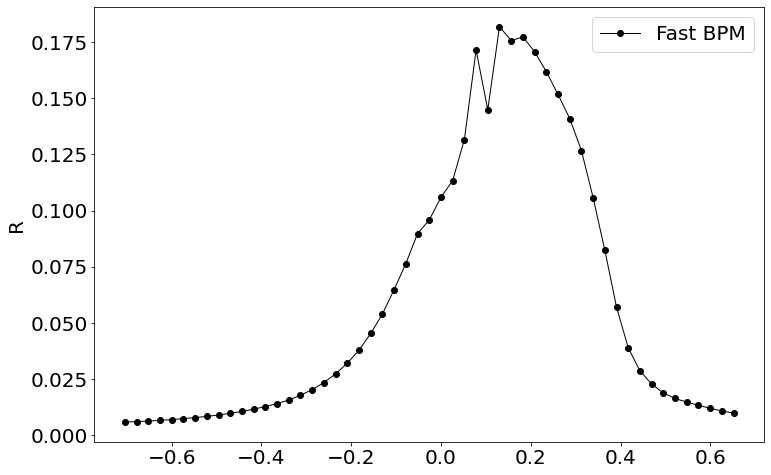

In [13]:
# plt.plot(XOPdata[:,0]*4.848137, XOPdata[:,1], '-', linewidth=2.1, color='red', label='XOP')
# plt.plot(1e6 * delta_theta, Rs, 'o-', linewidth=1.0, color='black', label='Fast BPM')

plt.plot(w_sim, Rs, 'o-', linewidth=1.0, color='black', label='Fast BPM')


plt.legend()
#plt.xlabel(r'$\Delta \theta$ (urad)')
plt.ylabel('R')

In [23]:
single_realization(delta_theta, 21)

Quiet mode disabled. I will talk a lot...
Congigured grid parameters
Congigured a Genesis2 beam
Congigured deformation model
Splitting recipe: Euler
Initialized tools...
Running with Genesis2 field
Delta theta:  0.0 ; Reflectivity:  0.20832991132921236 ; Transmission:  0.4581268330434195


(0.20832991132921236, 0.4581268330434195)